# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Independent Research Project
## General Information
- Matriculation No.: 200022090
- Degree Programme: Geography MA
- Deadline Date: Original deadline is 4th April 2024, but now 11th April with 7 day extension.

## GitHub Repository
GitHub Link: https://github.com/saffytaylor/UA_Final

## Declaration
In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced. 

---

# Political attitudes of York: Creating a spatial microsimulation and a geodemographic classification system of political leanings for the adult population of York

---
## Abstract

This study aims to fill a research gap by providing a projected micro-scale dataset of British Social Attitudes (BSA) survey results. We provide this dataset for further study, and demonstrate its effective use through the creation of a geodemographic classification model. Using the spatial microsimulation method of iterative proportional fitting, we create a synthetic dataset representing a selection of BSA survey results for the adult population of York using census figures as  constraint variables. We construct a classification model using kMeans clustering: a machine-learning method of grouping zones using randomly generated centroids. With this, we find a two-cluster approach suitable for our data, grouping zones by social and demographic characteristics alongside political leanings and social attitudes. We offer the individual level data, the aggregate data and the classifications up for further study, but acknowledge that these require more validation by the means of t-tests or other measures of measures of accuracy before concrete conclusions can be made from the data.

---

## Contents:
1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Methods">Methods</a>
   - <a href="#2.1.-Data-Sources-and-Pre-processing">2.1. Data sources and pre-processing</a>
   - <a href="#2.2.-Spatial-Microsimulation">2.2. Spatial microsimulation</a>
   - <a href="#2.3.-Geodemographics">2.3. Geodemographics</a>
3. <a href="#3.-Results">Results</a>
   - <a href="#3.1.-Pre-processing-of-input-data">3.1. Pre-processing of input data</a>
   - <a href="#3.2.-Spatial-Microsimulation">3.2. Results of microsimulation</a>
   - <a href="#3.3.-Geodemographics">3.3. Results of kMeans clustering</a>
4. <a href="#4.-Discussion">Discussion</a>
5. <a href="#5.-Conclusion">Conclusion</a>
6. <a href="#References">References</a>
7. <a href="#Appendix-1:-Reproducing-the-code">Appendix 1: Reproducing the code</a>
8. <a href="#Appendix-2:-Links-to-code">Appendix 2: Links to code</a>

---
## 1. Introduction

Spatial microsimulation is a relatively young and incredibly useful method within demographic studies. Granular data is relatively difficult to come by. The process of collecting data on a complete population is an extremely resource heavy process, and the only case that it is really ever carried is in the case of a census. Outside of this, national surveys will often sample a population to represent the whole. This is useful measure and allows us to gather a results a carry out studies and make assumptions about populations based on a small sample, it's reliable, less costly, and less time consuming. However, the usefulness of microscale data cannot be understated, and methods have been developed to filled this needs. One of which being microsimulation, which allows us to project individual data for a sample of a population onto a larger population, creating a synthetic dataset that is representative of an entire population. Despite it's usefulness, this method can be found to be under-utilised. The British Social Attitudes survey is one such survey that aims to represent the thoughts and attitudes of the British public, but only samples about 40,000 individuals, however. The knowledge of the spacial distribution of different social attitudes on a micro-scale could potentially have a great many applications, for polticial campaigns, for knowing where to concentrate developments in public services to name a few, but to the author's knowledge, no spacial microsimulations have ever been conducted with BSA survey data. This paper seeks to fill a gap in the literature/data, but beginning to provide the first wave of synthetic BSA results, using the city of York as a first case study. To demonstrate the use of this data, we then conduct a geodemographic analysis, using kMeans clustering to formulate a geodemographic classification model for political leanings and social attitudes in the city of York.

---

## 2. Methods
In this project, we make use of two main methodologies: spatial microsimulation to address the problem of a lack of granular data, and geodemographic clustering to demonstrate the use and benefits of this granular data, even when it is synthetically generated. In this case, we demonstrate how it can be used to create demographic classifications of areas where certain social/political attitudes prevail, which can be used to aid in political campaigning or for further study where such an understanding is necessary. 

Spatial microsimulation is a relatively recent development in the discipline of microsimulation, with most of the pioneering studies of microsimulation being combined with demography being published in the 1980s (Tanton and Edwards, 2013). It involves taking a dataset of individual-level granular data, and utilising aggregate data with a geometric quality (usually taken from a census) to reweight and project the individual data, effectively 'creating' a population of synthetic individuals. Although, not to confuse, it does not actually 'create' any new data as such, instead it calculates how representative each individual is of each zone and repeats individuals to make up the populations of each zone according to what we already know to be true of that zone. These microsimulations can be either static (creating a snapshot of the population) or dynamic (moving that population through time and certain phenomena). Although it is a young methodology, it's importance in all levels of planning cannot be understated. Granular data is incredible valuable in observing trends within populations on a spatial and temporal scale, but collecting data on every individual in a study area is expensive and arduous. Spatial microsimulation allows for the synthesis of granular data where it did not previously exist, and so allows for methods of studying entire populations without requiring data collection for an entire population. 

The method has been successfully utilised in a range of different  health studies (e.g., a recently published study used a static spatial microsimulation to simulate the prevalence of back pain across small areas in England (Smalley and Edwards, 2024), and dynamic spatial microsimulation was utilised a lot within the COVID-19 health pandemic to create models that simulated the spread of coronavirus on a local scale (Spooner *et al*, 2021)). Although it has had significance influence on other disciplines and areas of study too, e.g., studies of urban dynamics. An older application of microsimulation saw the method used in order to simulate labour markets to understand migration flows within an area, including individual characteristics such as age and training (Amrhein and MacKinnonf, 1988). As a method of creating granular data, it's applications are numerous and invaluable.

Our second methodology is kMeans clustering, which we employ to create a geodemographic classification of electoral zones in York. This is a method of grouping areas by certain characteristics to create 'clusters' of neighbourhoods (or even households if we were to look at a smaller scale). With a top-down approach to creating clusters, kMeans uses machine-learning to randomly distribute centroids and group objects based on their closest centroid, then re-adjusting the centroid to be the mean distance between all it's grouped objects. It relies on the idea that individuals will chose to live in areas with people similar to them and it often has quite broad applications, e.g., for marketing purposes to create clusters of different types of consumers. But so long as the data exists, we can use it to create clusters of any characteristics we chose. The methodology requires granular-level data but in aggregate form, therefore requiring the data we created with the previous method of spacial microsimulation to undergo further processing before we're able to carrying out any clustering.

In this study, we will use a static spatial microsimulation to create a population estimate of York based off of responses to the 2020 British Social Attitudes Survey. The British Social Attitudes survey is a longitudinal study, running since 1983, which surveys a representative population of Britain on their opinions on pressing social matters. Using a subset of the 2020 BSA dataset (NatCen Social Research, 2023) and constraints formed from actual data taken from the UK census, we use spatial microsimulation to create a representative dataset of BSA results for the entire adult population of York. We then use this dataset to form a geodemographic clustering system, sorting the 22 electoral zones of York into clusters based upon the dominant social and political leanings within that zone. 


### 2.1. Data Sources and Pre-processing

| Dataset | Description |
| ------ |  --- |
| British Social Attitudes Survey 2020 |  Individual level data for microsimulation. Contains a range of variables all pertaining to the participant's social attitudes and beliefs (NatCen Social Research, 2023). |
| UK Census Data | UK census data from 2011 (Office for National Statistics, 2011) at the electoral ward scale for York, only downloading data for aggregate counts of age and sex for all adults in York in order to form our aggregate constraints for microsimulation. |
| Electoral Zones Shapefile | Shapefile of York's electoral boundaries from 2011 (before changes to ward boundaries that occured after our census data was collected) (UK Data Service, 2024). |

*Table 1: Data sources*

To carry out these methods we use three data sources, as shown in table 1 above. Each of these need a significant amount of cleaning before we can use them within our methods. The British Social Attitudes survey is originally in the format of a .sav file. For use in a spatial microsimulation methodology, the file needs to be transformed into a CSV, the transformation of which we do with an <a href="Cleaning.ipynb#SPSS-to-CSV">RStudio script</a>. We then <a href="Cleaning.ipynb#Step-3:-Subsetting">create a subset</a> of the data, only including data entries for individuals located in 'Yorkshire and the Humber' to be able to more accurately simulate a population of York. At the same time, we <a href="Cleaning.ipynb#Step-4:-Cleaning-the-new-CSV">remove all unnecessary columns</a> in order to increase processing times. After further removing all rows containing NaN values, we are left with a complete dataset. To finish, variables are renamed to more descriptive names for ease of processing and analysis. 

The UK Census Data from 2011 is accessed through the UK Data Service, and through this we download aggregate counts of age and sex of all adults grouped by electoral wards in York. These are manually cleaned in Microsoft Excel to form to constraints for our spatial microsimulation. Age is merged into two categories (between 18 and 64, and 65 and over), sex is left as male or female. 

The electoral zones shapefile also requires a degree of cleaning before we can use it. As it is when it's downloaded, we are missing the geocodes for electoral zones to match the census data zones; to fix this we <a href="Fixing the shapefile.ipynb">add the codes</a> from the census data to the shapefile, merging on the ward names, to ensure that both files contain the geocodes necessary for later analysis. 

Once we've carried out the spatial microsimulation and have the resulting dataframe filled with granular data to represent a complete adult population of York, we need to prepare this data for use in kMeans. we also need to transform this data into aggregate counts for each zone in order to carry out of kMeans clustering. We create a dataframe of aggregate counts this by <a href="Cleaning.ipynb#Step-3:-Creating-a-new-database-of-aggregate-counts">creating new 'pivoted' dataframes</a> and adding the counts that these give us into a new dataframe. We then <a href="Cleaning.ipynb#Step-4:-Validation-and-checking-the-data-to-ensure-we've-aggregated-it-correctly">validate these new columns</a> by checking counts between our aggregate columns for each category, ensuring that each category is still representative of our population, before exporting the dataframe as a CSV for use in geodemographics.

### 2.2. Spatial Microsimulation

In this study, we employ the use of a static spatial microsimulation to reweight aggregate data from the British Attitude Survey (BSA) to represent the population of York, UK. Using our cleaned BSA data, we further <a href="Spatial_microsimulation.ipynb#Step-3:-Preparing-the-data-for-spatial-microsimulation">prepare the data</a> for microsimulation. This involves removing all columns from our individual data aside from the ones that directly relate to the constraint variables (age and sex). We rename categories to match between constraints and individual data, and then 'flatten' the individual data into boolean values to ensure that both dataframes have the same dimensions. We then use the python package 'ipfn' to carry out <a href="Spatial_microsimulation.ipynb#Step-4:-Iterative-Proportional-Fitting">iterative proportional fitting</a>. This package calculates weights for each individual to show how representative they are of each zone. We validate the results of these caluculations by calculating the marginal distribution of individuals based on the results, and comparing these with out constraints. 

The next steps allow us to construct our new synthetic population. First, we define a function for <a href="Spatial_microsimulation.ipynb#Step-5:-Intergerisation-using-the-TRS-method">integerisation</a>. Here, the float weights we previously calculated become integers representing the number of individuals in each zone. This study uses the 'TRS' method of integerisation ('truncate, replicate, sample') method put forward by Lovelace and Ballas, which has been proven to be much more efficient than previous methods, and operates with much less room for error (Lovelace and Barras, 2013). The next step is to create another function for <a href="Spatial_microsimulation.ipynb#Step-6:-Expansion">expansion</a>. Each weight that we integerised indicates how many times an individual's data is repeated within an electoral zone in our final synthetised dataset. Defining these as functions allows us to call them in one line, allocating individuals one zone at a time and adding the new, sythensized individuals into a dataframe until we have a complete granular-level dataset representing BSA results for the entire adult population of York. 

### 2.3. Geodemographics

In order to carry out geodemographic clustering, we use the aggregate dataset we made and described in <a href="#2.1:-Data-Sources-and-Pre-processing">Section 2.1: Data Sources and Pre-processing</a> based on the dataframe we created with spatial microsimulation. We transformed all of the data into columns with counts for different reponses to all categories, but once again we do not need all of these categories for our clusters. We <a href="Geodemographics.ipynb#Step-4:-Subsetting-the-data">calculate percentages</a> for all columns we consider useful for clustering, and replace all aggregates counts in our dataframe with these percentages for a more standardised approach, and rename columns with shorter names for ease of analysis later on. Next, we <a href="Geodemographics.ipynb#Step-5:-Z-scores-and-measuring-for-association">calculate z-scores</a> to finish standardisation, allowing ease of comparision between columns. Usually at this point in a geodemographic clustering method, we would measure the degree of <a href="Geodemographics.ipynb#Step-5:-Z-scores-and-measuring-for-association">association between variables</a>. Ideally within a geodemographic kMeans clustering, variables should not be significantly correlated with eachother. However, when working with a synthetic population, variables will of course be correlated as the previous method of microsimulation didn't create any new variables, just repeat individuals across zones to represent the population. Therefore, we demonstrate this method within our code, which can be viewed through <a href="#Appendix-2:-Links-to-code">Appendix 2</a>, but we omit the graphs from our results as they do not tell us anything useful for our analysis. Therefore, where we'd usually be able to narrow down variables at this step, we instead keep the ones that are key for our clustering regardless of associations.

With our selected variables, we carry out a <a href="Geodemographics.ipynb#Step-6:-k-Means-clustering">kMeans clustering</a>. We use the elbow method and compare between results using a Principal Components analysis (PCA) for the sum of squared distances, and the between cluster sum of squares to find our ideal number of clusters, and then begin testing numbers of clusters. We <a href="Geodemographics.ipynb#Step-7:-Testing-different-numbers-of-clusters.">test several different numbers of clusters</a> and adjust variable inputs until we land on a variable selection and cluster number that gives us an equal distribution of zones between clusters, and clusters that have discernably different characteristics. We have settled on our classification, we can remove z-scores from the dataframe and add back our aggregate counts, finally saving the dataframe as a shapefile. This dataframe has a geographic quality and also includes our zones, so can be used to group the population by dominating demographic/social characteristics. 


---

## 3. Results

### 3.1. Pre-processing of input data
Following the steps laid out in the <a href="#2.1:-Data-Sources-and-Pre-processing">pre-processing methodology </a>, we remove all unnecessary data, allowing us to cut down on processing times as the CPU doesn't have to divert resources towards carrying out operations on data we do not need. The BSA dataframe read in orginally had a total of 3964 rows and a total of 210 columns. Subsetting this data to only include columns pertaining to our study interests and to only include data entries located within Yorkshire and the Humber allowed us to cut this dataframe down to 340 rows and 18 columns. Further removing rows containing  NaN values and resetting our index gave us a complete dataset with dimensions of 276 columns and 18 rows. We also remove a row where age is '999' as this value indicates a participant who refused to give their age, and add an ID column with unique identifiers for each row, giving us a final dataset with 275 rows and 19 columns.

We formed our constraints in Microsoft Excel, extracting data for age and sex from the UK Data Service Infuse function (Office for National Statistics, 2011) for the adult population of York, aggregated by Electoral Zone. We group age into two categories to form the first of our constraints: individuals between the age 18-64 and individuals over the age of 64 (as shown by figure 1). Sex is already categorised into male and female, so we leave these as such (distributions shown by figure 2). Constraints are validated by ensuring that they both represent the same population number of York. As the sum of aggregates totals 162,096 for both constraints we can conclude that they are both valid constraints representative of York.

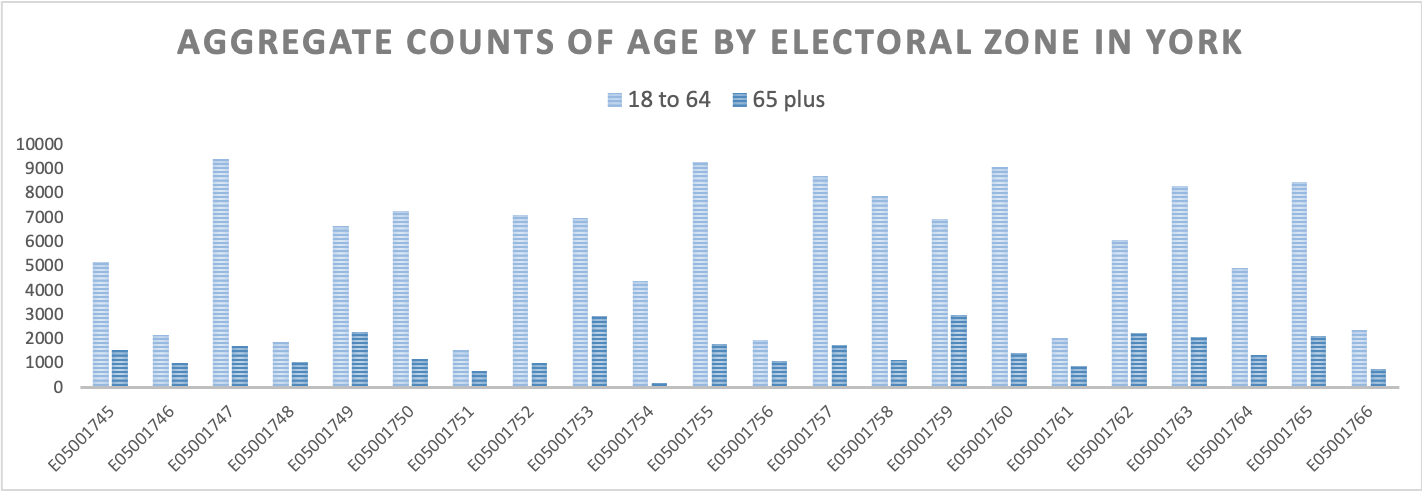
*Figure 1: Bar graph to show age constraint. (Authors interpretation of census data (Office for National Statistics, 2011)).*

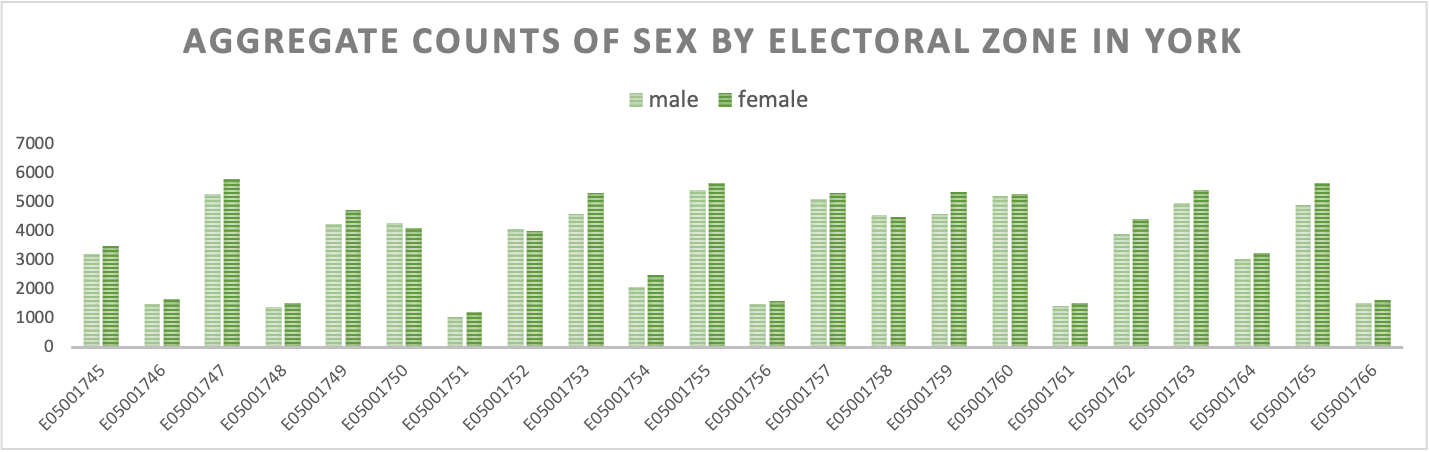
*Figure 2: Bar graph to show sex constraint. (Authors interpretation of census data (Office for National Statistics, 2011)).*


### 3.2. Spatial Microsimulation
Our spatial microsimulation allowed for us to create a full granular dataset of BSA results representative of the entire adult population of York. The resulting dataset is a total of 162,096 rows and 19 columns, successfully synthesizing BSA survey data for the entire adult population of York. A snapshot of the resulting table is visualised below by figure 3, but spatial microsimulation data is best represented by analysis of aggregate counts, which we look at in further detail in the next section (e.g. in figure 4).

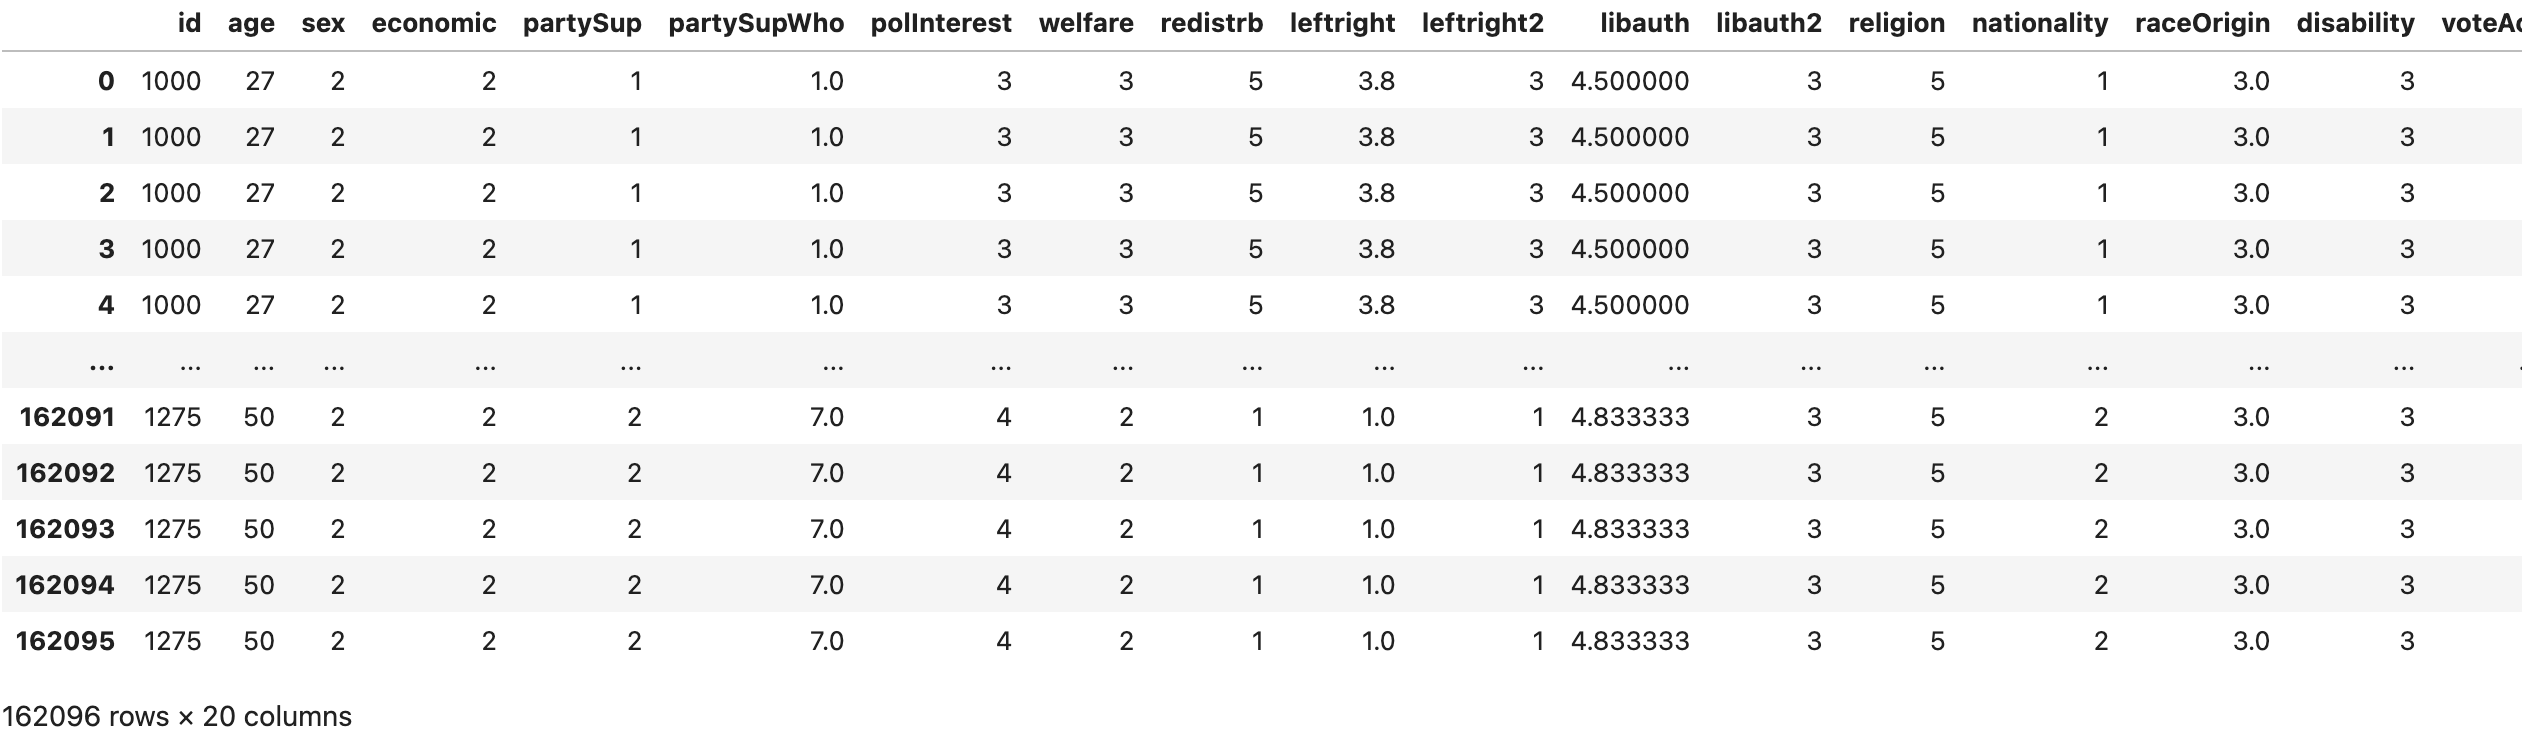
*Figure 3: Output projected dataset.*

### 3.2. Geodemographics

Using the aggregate dataframe produced from the results of the previous method of spatial microsimulation, we formulate a geodemographic clustering model based upon the following variable selection shown in table 2. The first four rows (political interest, welfare opinions, wealth re-distribution and left/right) are the variables included in order to gauge individuals political ideologies and where they place on a left/right political spectrum. Political interest is included in order to see if some grouping consider themselves more engaged with politics than others. We include opinions over the current state of the welfare system to observe whether this changes with other opinions or identities; opinions over the welfare system can heavily vary, some can consider the state to be doing too much by the means of welfare whilst others argue it is not doing enough. We also consider opinions over wealth redistribution, those in support of wealth redistribution are thought to typically fall on the left-side of the political spectrum, including this variable within our clustering will allow us to observe to what extent this is true or not. And finally we inlude a measure of how participants identified with left/right/centrist politics to observe how all of the former variable differ within these categories. 

We also include several other social and demographic characteristics pertaining to identity, inlcuding current religion followed (divided here into Christian faith, those of non-Christian faith, and those who are non-religious), national identity (divided into those identifying as 'british' and those identifying as 'english'),  racial origin (here divided into white origins, asian origins, mixed origins, or other racial origins, a limited selection but all that happened to be represented within our origin subset of the BSA on which we based our microsimulation). We also inlcude a health category, indicating what portion of the population suffers from a disability that affects the way they live their day to day life. All of these social/demographic/health characteristics will have an impact in shaping someone political outlook (e.g., a previous study also using BSA survey responses  found that national identity does impact an individuals voting behaviours, and that those adopting the 'english' identity are more likely to support more right-wing political parties (Denham and Mckay, 2023). Therefore we opt to include them in our cluster analysis to observe any trend that arise in the groupings. With this selection, we go create a series of histograms based on each variables distributions shown by figures 4a through 4p.


| Data | Topic | Variable Names | Description and explanation | 
| ------ | --- | --- | --- |
| Political interest | Political/social | 'polInter_yes' | Does the participant consider themselves to be interested in politics.  |
| Welfare opinions | Political/social | 'welfare_pro' | What does the participant think of the current welfare system? Are they pro welfare or anti. |
| Wealth redistribution | Political/social | 'redist_pro' | Is the participant for or against the idea of wealth distribution. |
| Left/right | Political/social | lean_left', 'lean_right', 'lean_centr' | Does the participant consider themselves more on the left, right, or centre of the political scale. |
| Religion | Social/demographic | 'rel_christ', 'rel_nonchrist', 'rel_non' | Individuals religious identity has an impact what they believe to be moral and ethical, here we split it up by individuals identifying as a christian, identifying as religious but not christian, or non-religious. |
| National identity | Social | 'nat_british', 'nat_english' | This singles out individuals who either adopt the national identity of 'British' or of 'English'.| 
| Racial origin | Demographic | 'race_white', 'race_asian', 'race_mixed', 'race_other' | This category describes individuals racial origins for our subset. |
| Disability | Health | 'disab_aff' | Indicates individuals who have a long-term health problem that affects the way they live their day to day life. |

*Table 2: Variable description and explanation.*




\
*Figure 4a-p: Histograms for each variable, observering distribution of values using the dataframe produced by the previous method of microsimulation.*
| | |
|---|---|
|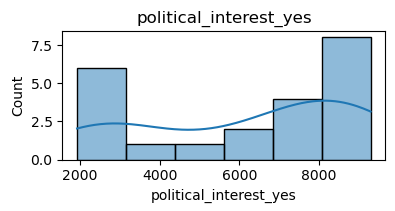| 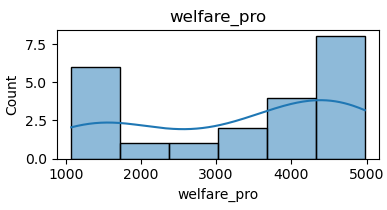
|*Figure 4a: Histogram of political interest.*| *Figure 4b: Histogram of opinions on the welfare system.* |
|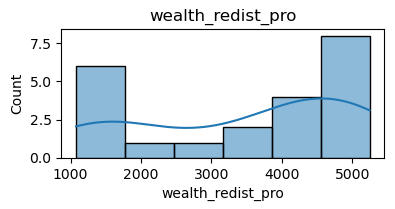|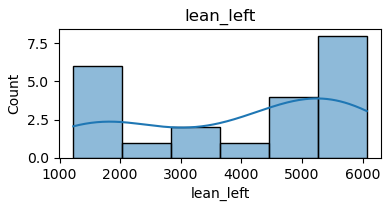|
| *Figure 4c: Histogram of pro-wealth distribution opinions.* |*Figure 4d: Histogram of left-leaning individuals.*|
|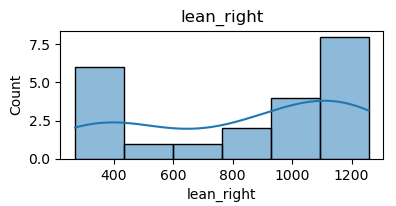| 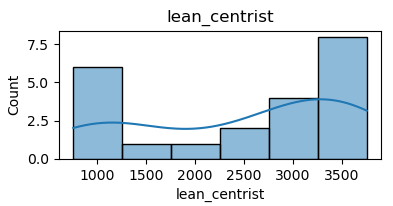 |
|*Figure 4e: Histogram of right-leaning individuals.* |*Figure 4f: Histogram of centrist individuals.*|
|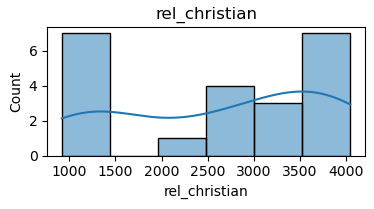|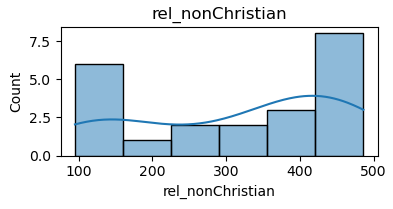|
| *Figure 4g: Histogram of christian individuals.*| *Figure 4h: Histogram of religious non-christian individuals.*|
|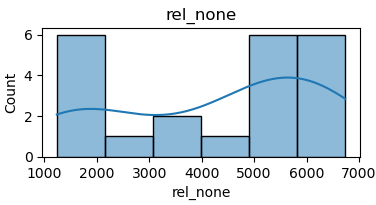|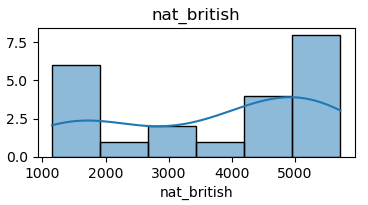|
| *Figure 4i: Histogram of non-religious individuals.*|*Figure 4j: Histogram of British-identifying individuals.*|
|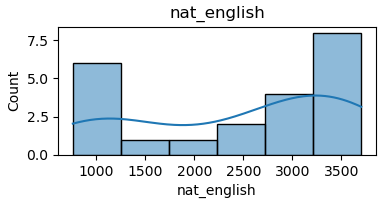|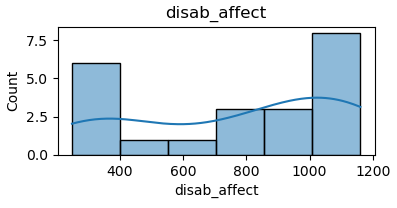|
| *Figure 4k: Histogram of English-identifying individuals.*|*Figure 4l: Histogram of individuals affected daily by a disability.* |
|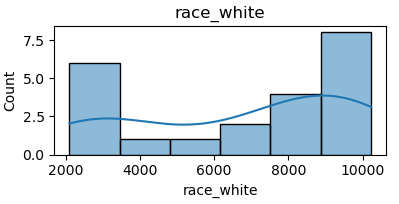|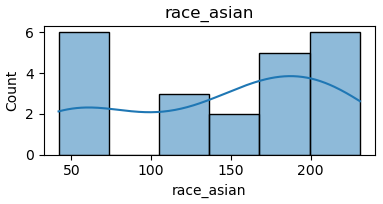|
| *Figure 4m: Histogram of individuals with white racial origins.*|*Figure 4n: Histogram of individuals with asian racial origins.*|
|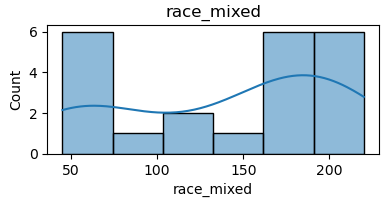|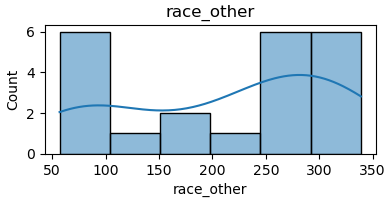|
|*Figure 4o: Histogram of individuals with mixed racial origins.*| *Figure 4p: Histogram of individuals with other racial origins.*|

The graphs shown by figure 4 above allow us to check the distributions of our chosen variables. From what we can observed, they all appear to follow the pattern of there being a high number of zones with low counts and a high number of zones with high counts, with fewer zones taking a middle ground inbetween. This is potentially explained by the fact that we're using synthetic data, which means we're only dealing with 275 unique rows to make out our aggregate counts. Therefore we'll expect to see similar distributions throughout the histograms in the same way that we expect our variables to be highly correlated. As mentioned in our methodology, we therefore we don't rely on a correlation matrix to omit variables as the majority of our variables will be highly correlated.

We used two elbow tests to estimate the number of clusters that best suited our variable selection: analysing results based on a kMeans sum of squares (figure 5a) and based on a kMeans between-cluster sum of squares (figure 5b). Figure 5a places the 'elbow' at 2 clusters, with a second plateau at around 5 clusters. Figure 5b has an elbow at 1 cluster, and again at 4. Therefore we aim to have between 2 and 5 clusters in total, and will test different cluster numbers to see which characteristics are grouped and what best fits the synthetic BSA data. 


|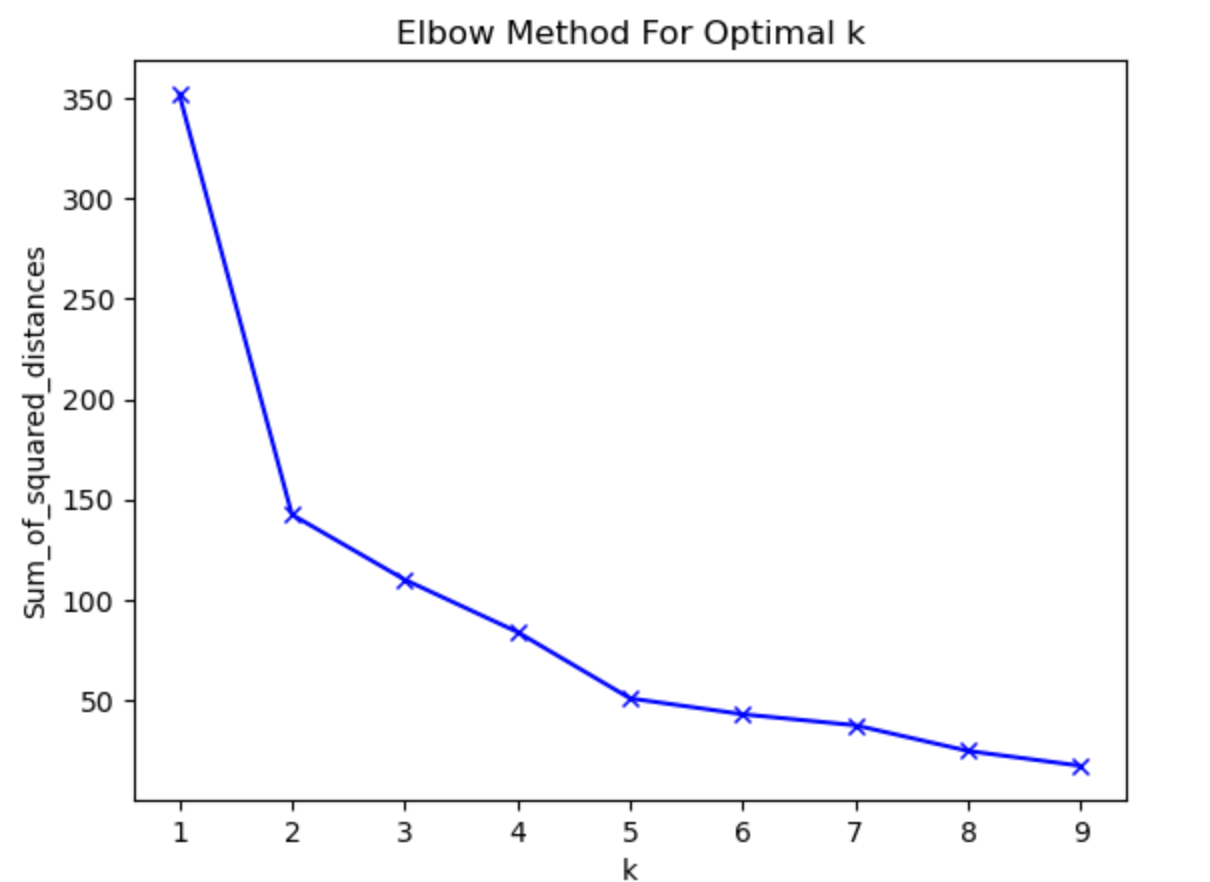 |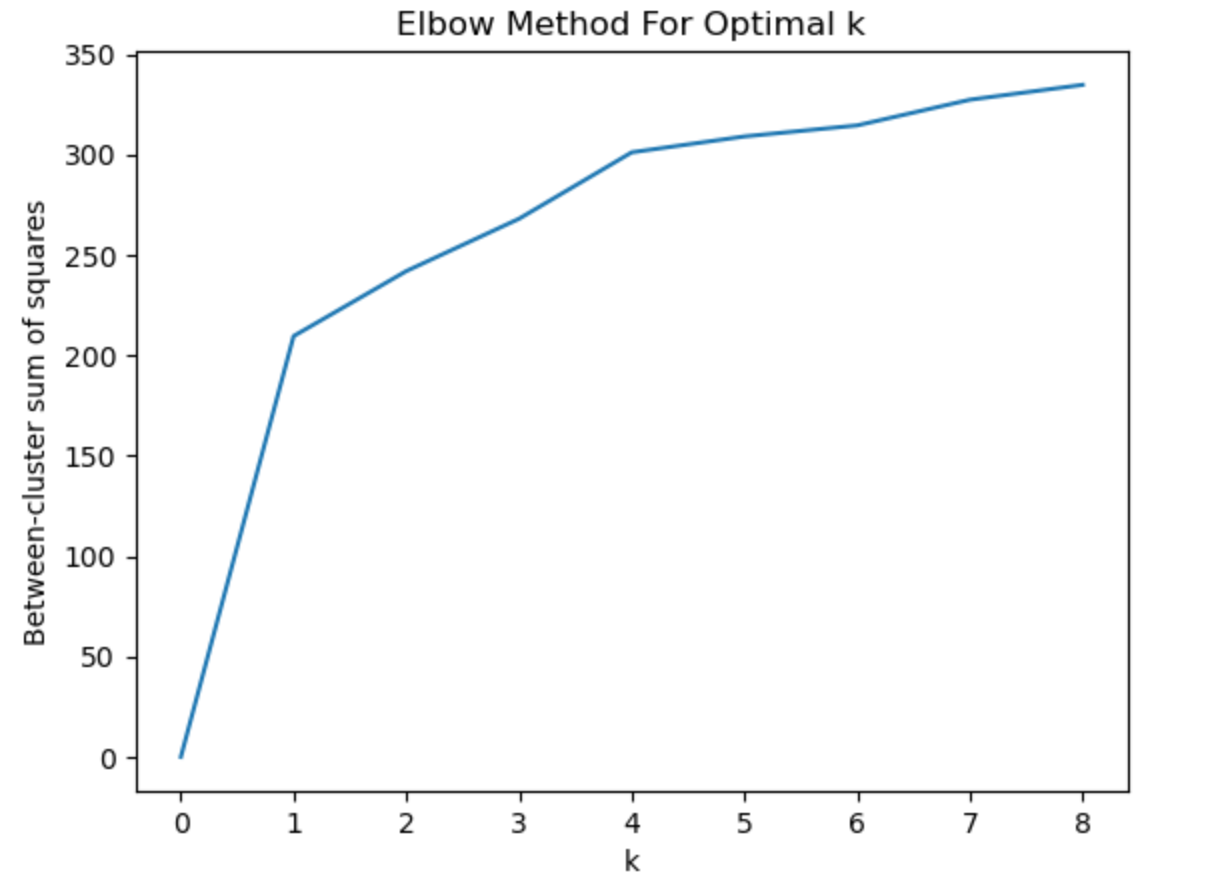|
|---|----|
| *Figure 5a: Line graph of kMeans sum of squares.* |  *Figure 5b: Line graph of kMeans between-cluster sum of squares.* |


We test a variety of number of clusters with different combinations of variables, and finally select a cluster method that sorts electoral wards into two groups of equal size, representing discernably different characteristics. We use a Pricipal Components analysis to evaluate our classification. Figure 6 shows that the two components explain a total of 89.33% of the point variability. Figure 7 then divides this between the first two principal components, showing that the the first principal component accounts for variability 82.60% of this variability, whereas the second only accounts for 6.73% of variability.


| 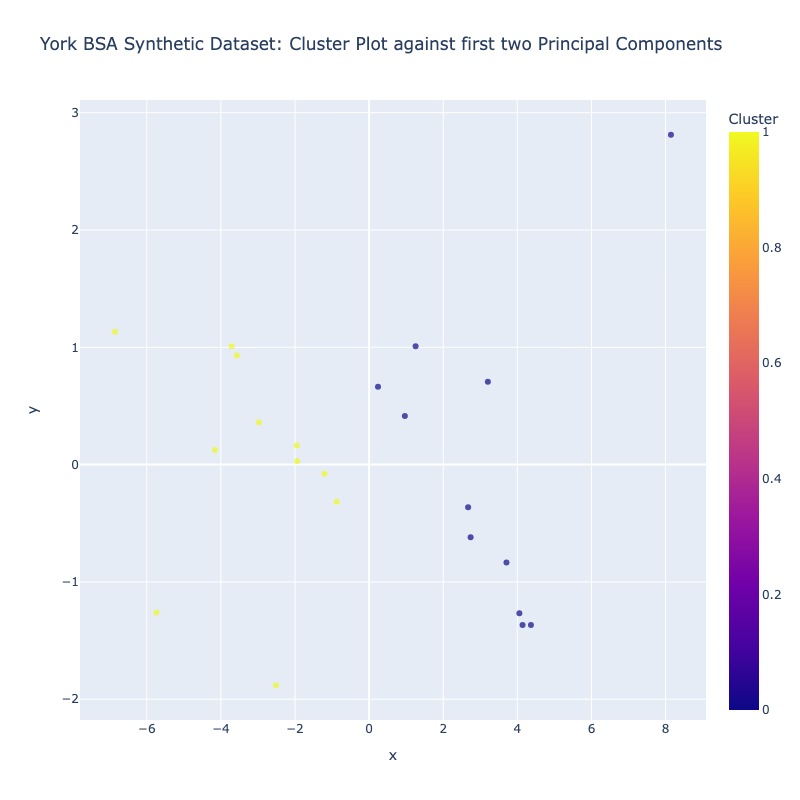 |
|--- |
|*Figure 6: Scatterplot of PCA results.* |

|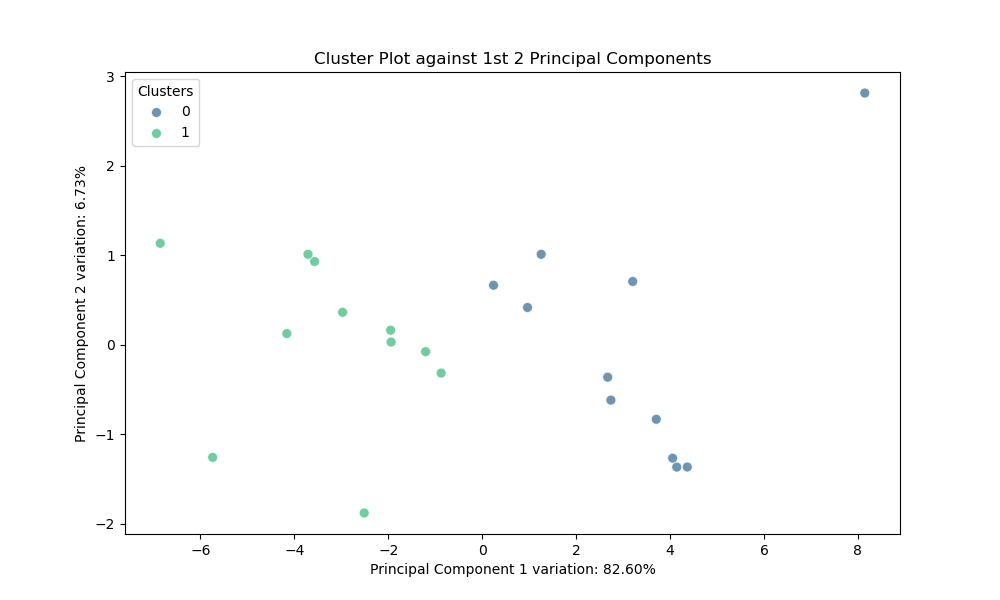 |
|---|
| *Figure 7: Scatterplot of PCA results divided between first two principal components.* |


The characteristics of our two final clusters are shown by figures 8a and 8b. Both clusters show high interest in politics but that appears to be the only similarity between the two groups. Cluster 1 (figure 8a) forms our cluster to show zone containing more liberal, left leaning individuals. In terms of social and demographic characteristics, this first cluster hosts an increase in individuals not identifying as Christian, identifying with British as a national identity rather than English, and of non-white racial origins. In terms of their political opinions, this cluster contains most left leaning individuals with an increase in individuals who are unhappy with the current welfare system in the UK and welcome the idea of wealth redistribution. Cluster 2 (figure 8b) appears to boast a much more conservation population. Socially and demographically, we observe an increase individuals who do identify as Christian, those who identify with 'english' as their national identity, and those with white racial origins. These zones show more individuals who identify with centrist or right-wing politics, with an increase in the number of individuals who are content with the way the welfare system is currently run, and against the idea of wealth redistribution. This cluster also has an increase in individuals who have a disability that affects their daily lives. 


| 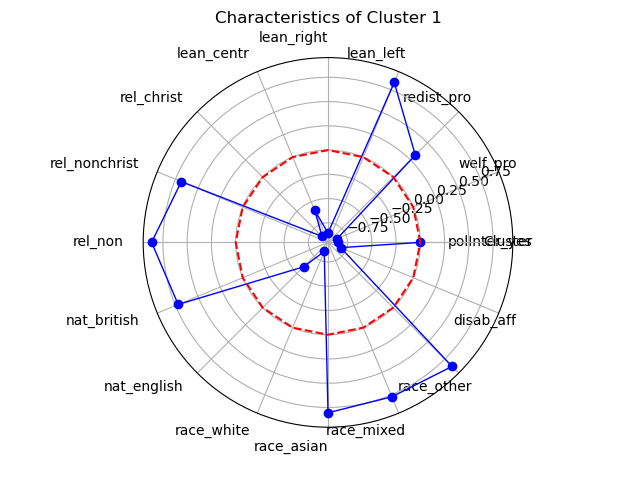 | 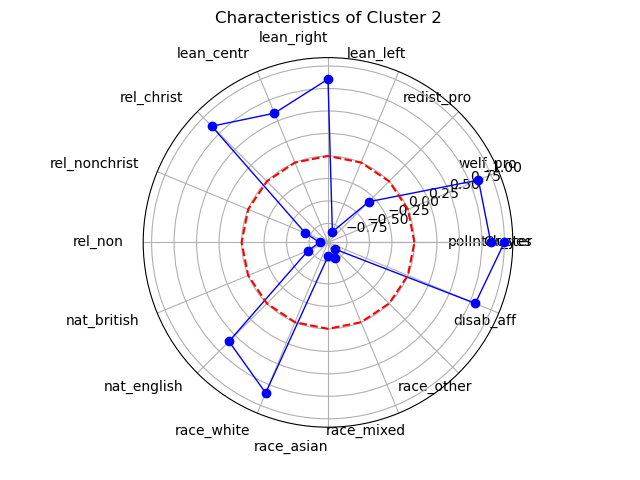 |
|---|---|
| *Figure 8a: Polar plot to visualise characteristics of Cluster 1.* | *Figure 8b: Polar plot to visualise characteristics of Cluster 2.* |


With our clusters defined and settled on, we create create a final interactive choropleth map of York, grouping electoral wards into their defined clusters (which we have now named, with cluster 1 now being 'Left-leaning', and cluster to being 'Right-leaning or centrist), as is shown below by figure 9.

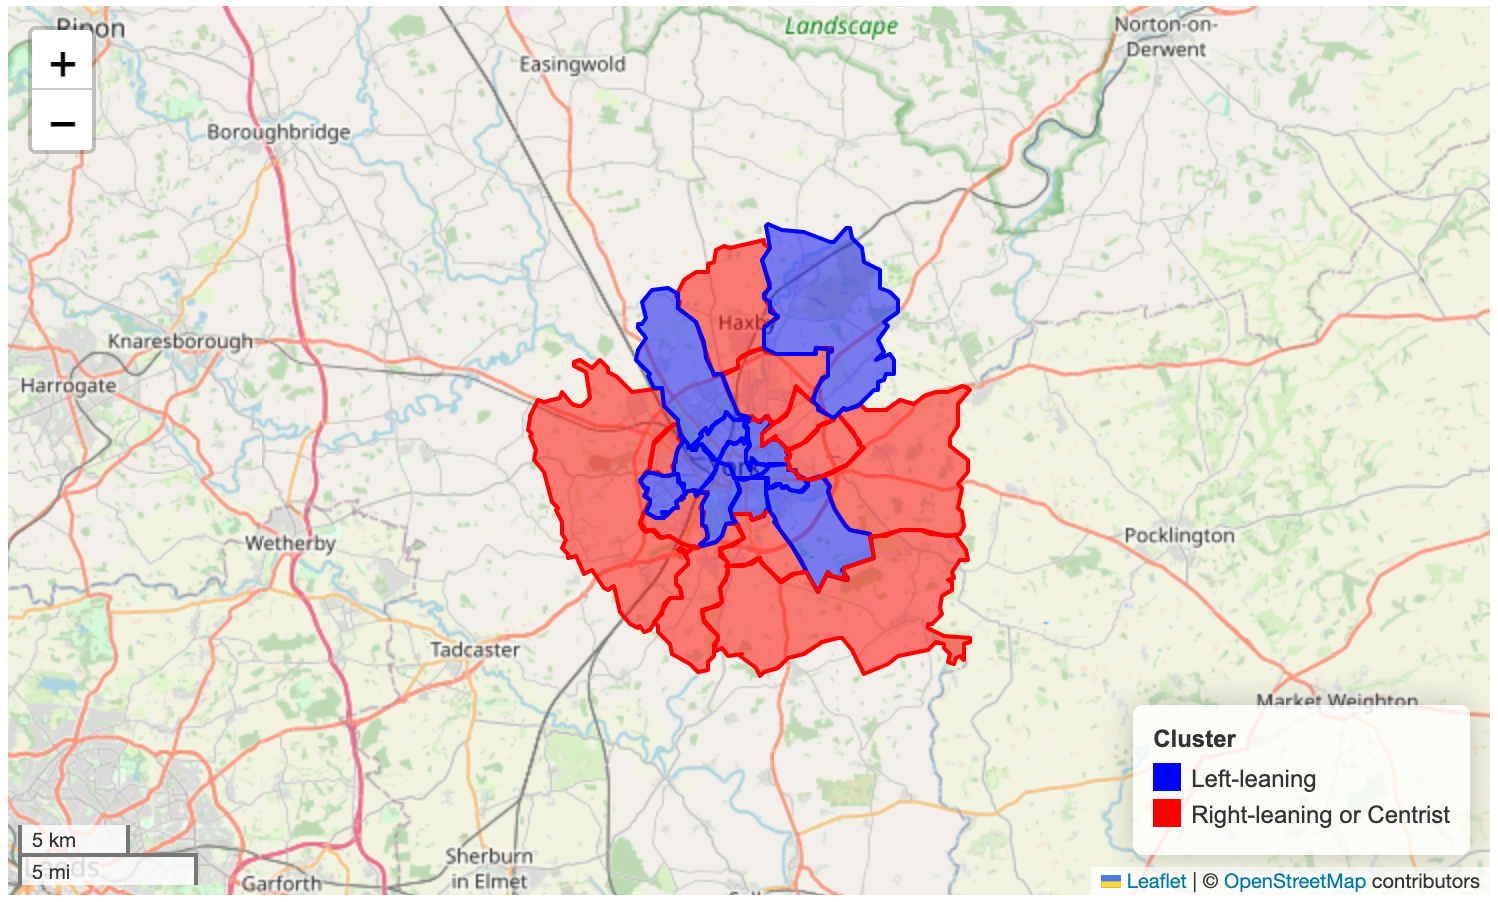
*Figure 9: Final map of York clusters for political thoughts and social characteristics dominant in Electoral Wards, created with synthetic BSA data.*

## 4. Discussion

One of the aims of this study was to create a synthetic population of York to form a representative estimate of the results of the British Social Attitudes (BSA) survey, had it been carried out on a micro-scale over York. This was accomplished successfully, and we have created a dataset that can be employed in further study and analysis of the city's social attitudes. However, the method doesn’t exist without its limitations. When cutting down our dataset, we subset to remove any rows that have NaN values. How many columns of the BSA we included in our subset impacted how many rows would be eliminated by removed NaN values. For example, including the variable that pertained to how satisfied respondents were with the NHS cut our dataset far too thinly. Therefore, our variable selection for our first methods depended on both how relevant we thought the variable to be, and also how it would impact the dimensions of our final dataset. The columns we settled with, once cleaned to remove NaN data, allowed us to have a dataset of 275 individuals representing York, a substantial enough subset to be able to synthesize our population and carry out our Geodemographics for further analysis. However, it was noticed later this meant that certain demographics are not present within our population. There are particular ages that are missing, but likely most crucially our dataset of 275 individuals does not have any rows that pertain to an individual of black racial origins. Therefore, because microsimulation does not create any ‘new data’, representation of a black population in York is missing from our simulated data. This is a major drawback of our simulated population, and limits its application in certain studies, but studies of individuals outside of racial origin may still be carried out. We still utilise racial origins in our kMeans clustering, however it is mostly as a descriptor to know if the method finds a different between white versus non-white political affiliations. 

In terms of evaluating our clustering methodology, we used a PCA method. Our kMeans analysis found that for the cluster method we were intending to create, it was best to form a classification system utilising two clusters, and we evaluated these in figures 6 and 7. Figure 6 allows us to conclude that this method of clustering explains 89.33% of point variation. As we can see in the figure, the method groups electoral zones in an even split, with 11 zones per cluster, but points appear to be fairly far from each other without much overlap to be observed. However, once again, with synthetic data this can be expected to an extent as whilst we have a total number of 162,096 data entries, there are only 275 that are unique. We have similar difficulties earlier in the methodology where in a typical geodemographic clustering method, one would seek to eliminate any variables with strong correlations. As has been previously mentioned, this not always possible with synthetic data, as data will inevitably by highly correlated due to the nature of the spatial microsimulation method. Figure 7 allows us to looking into the principal components in great details, allowing us to infer that the 1st principal component explains 82.60% of variance, and the 2nd principal component explains a further 6.73%. For the descriptive purposes that we are creating this cluster model for, this is an acceptable amount of variance explained by our model.

The two clusters that we create sort the 22 electoral zones of York into two groupings of dominating characteristics, and the archetypes of each cluster could be observed to be somewhat stereotypical. The first cluster is characterised best by being more left-leaning, with higher proportions of non-white, non-Christian individuals. The second is the more conservative, right-leaning or centrist population, with a higher proportion of the remaining white/Christian/nationalist individuals. As observed in Figure 9, we can observe that the electoral zones in Cluster 1 dominate central York, stretching north, with a single zone in the north-east as well. The right-leaning/centrist zones are concentrated in outer York, surrounding the left-leaning zones. This trend is similar to what can be observed in recent election results. In the four constituencies representing York, three seats are currently held by conservative members of parliament (one of which being Rishi Sunak, current prime minister of the UK), whereas only one is represented by labour (the traditionally more left-leaning party of the two), this being central York, continuing the trend of dominant political positions within an area that is represented in our clusters. This can be observed to validate our clusters to an extent, but there is much room for further studies to be carried out in terms of validating methods.

Validating microsimulation models is a particularly difficult task. One of the most clearest methods of validating microsimulation data is creating cross-tabulations to compare to aggregate data that does exist (e.g., census data) using Total Absolute Error (TAE) calculations (Ballas, Clarke and Turton, 1999). But this becomes difficult when there is no objective fine granular data that we can compare the outputs of microsimulation to (Edwards and Tanton, 2013). The former method could be employed here but only with certain variables that appear in both our projection and in the census. We cannot use sex or age as these were our constraints initially taken from the census, but it is possible that we could compare our results of 'racial origin' to those from the census. This comparison could also be carried out using the aforementioned method of TAE, or using a t-test, z-scores or by another measure of accuracy (*ibid.*). However, this is all limited when we do not have 'actual' results to play the counter dataset we compare our synthetic data too. This is still an area that is being heavily researched, as methods of validating spatial microsimulations remain limited. We have prepared an aggregate dataframe, which can be utilised for validation, but this is a direction for further study once methods of validation are more fully discovered. 


---

## 5. Conclusion

This paper sought out to be able to provide a new granular set of spatial data where we previously only had broad aggregates, and successfully synthesized a representative set of results for the British Social Attitudes Survey on the micro-scale for the city of York. We then successfully implemented that dataset for further analysis, demonstrating one of the uses and benefits of having individual datasets. Our kMeans cluster methodology encounters limitations, some of which are explained by the previous method of spatial microsimulation and the increased correlation between variables that will inevitably occur in such a a method. However, our resulting clusters created appear to show some correlation with what we know to be true about the voting history and political leanings in certain areas of York, so we can conclude that our simulated data hold some weight as an accurate representation of York. Limitations in the methods that we can use to validate spatial microsimulation results mean that limitations could potentially be carried on into our geodemographic cluster model. Validation is very much an ongoing thread of research, and this is the direction we would expect this study to continue in. Though, without validation, we have successfully filled a data-gap and created a fine granular dataset of social and political attitudes for the city of York, and demonstrated it's use, where such data did not previously exist. 

---

## References

- Amrhein, C.G., and MacKinnonf, R.D. (1988) 'A Microsimulation Model of a Spatial Labor Market', *Annals of the Association of American Geographers*. 78(1). pp.112-131. doi:  10.1111/j.1467-8306.1988.tb00194.x
- Ballas, D., Clarke, G., and Turton, I. (1999) 'Exploring Microsimulation methodologies for the estimation of household attributes', *Paper presented at the 4th International Conference on GeoComputation*. Available at: https://www.geog.leeds.ac.uk/papers/99-11/99-11.pdf. (Accessed: 30th March 2024). 
- Denham, J. and Mckay, L. (2023) 'The Politics of England: National Identities and Political Englishness', *The Political Quarterly*. 94(4). pp.613-624. doi:10.1111/1467-923X.13313
- Edwards, K.L., and Tanton, R.(2013) 'Validation of Spatial Microsimulation Models', in Tanton, R., and Edwards, K.L. (eds), *Spatial Microsimulation: A Reference Guide for Users*,  Dordrecht: Springer. pp.249–258.
- Haven (2024) *Read and write SPSS files*. Available at: https://haven.tidyverse.org/reference/read_spss.html. (Accessed on: 22nd March 2024).
- Lovelace, R. and Ballas, D. (2013) '‘Truncate, replicate, sample’: A method for creating integer weights for spatial microsimulation', in *Computers, Environment and Urban Systems*. 41. pp.1-11. doi: 10.1016/j.compenvurbsys.2013.03.004.
- NatCen Social Research (2023) *British Social Attitudes Survey, 2020* [data collection]. UK Data Service. SN: 9005, doi: 10.5255/UKDA-SN-9005-1 (Accessed on: 22nd March 2024).
- Office for National Statistics (2011) Census aggregate data. *UK Data Service*. Edition: February 2017. DOI: 10.5257/census/aggregate-2011-2
- Readr (2024) *Write a data frame to a delimited file*. Available at: https://readr.tidyverse.org/reference/write_delim.html. (Accessed on: 22nd March 2024). 
- Smalley, H. and Edwards, K. (2024) 'Chronic back pain prevalence at small area level in England - the design and validation of a 2-stage static spatial microsimulation model', *Spatial and Spatio-temporal Epidemiology*. 48. pp.1-10. doi: 10.1016/j.sste.2023.100633
- Spooner, F., Abrams, J.F., Morrissey, K., Shaddick, G., Batty, M., Milton, R., Dennett, A., Lomax, N., Malleson, N., Nelissen, N., Coleman, A., Nur, J., Jin, Y., Greig, R., Shenton, C., and Birkin, M. (2021) 'A dynamic microsimulation model for epidemics'. *Social Science & Medicine*. 291. pp.1-12. doi: 10.1016/j.socscimed.2021.114461
- Tanton, R., and Edwards, K.L. (2013) 'Introduction to Spatial Microsimulation: History, Methods and Applications', in Tanton, R., and Edwards, K.L. (eds), *Spatial Microsimulation: A Reference Guide for Users*,  Dordrecht: Springer. pp.3-8.
- UK Data Service (2024) *Boundary Data Selector*. Available at: https://borders.ukdataservice.ac.uk/bds.html. (Accessed on: 22nd March 2024). 


## Appendix 1: Reproducing the code

All of the code used to produce this report can be found through the following GitHub link. In order to reproduce the code, this github repository will have to be cloned to your own private hard-drive, and you will also need to download the data seperately. All data for this project can be accessed from a public google drive. The folder here (named 'data') will need to be downloaded, and placed into the downloaded respository, so the data folder sits in the same folder alongisde the jupyter notebooks with our python script. To be able to save outputs from the code, certain lines will have to be updated with your own

Required linkeds:
- <a href="https://github.com/saffytaylor/UA_Final">GitHub link to clone respoitory</a>
- <a href="https://drive.google.com/drive/folders/1rCNK6KF-U-WAmz7BTxkU-_Z3nBGyZsz3?usp=sharing">Google Drive link for data</a>

## Appendix 2: Links to code
Links to all jupyter notebooks containing python scripts used for this project:
1. <a href="converting to CSV.R">RScript for converting .SAV to .CSV</a>
2. <a href="Cleaning.ipynb">Cleaning the data</a>
3. <a href="Fixing the shapefile.ipynb">Fixing the shapefile</a>
4. <a href="Spatial microsimulation.ipynb">Spatial Microsimulation</a>
5. <a href="Geodemographics.ipynb">Geodemographics</a>